In [2]:
from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader
from argoverse.map_representation.map_api import ArgoverseMap
from argoverse.visualization.visualize_sequences import viz_sequence
from IPython.display import clear_output

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from knn import get_multiple_forecasts_norm
import scipy.ndimage
%matplotlib inline

In [4]:
train_dir = '/home/aaron/workspace/argoverse/data/forecasting_train_v1.1/train/data'
val_dir = '/home/aaron/workspace/argoverse/data/forecasting_val_v1.1/val/data'
test_dir = '/home/aaron/workspace/argoverse/data/forecasting_test_v1.1/test_obs/data'
afl = ArgoverseForecastingLoader(train_dir)
avm = ArgoverseMap()
norm_train_trajs = np.load('norm_train_agent_trajectories.npy', allow_pickle=True)
train_nt_dists = np.load('train_agent_nt_dists.npy', allow_pickle=True)
test_nt_dists = np.load('test_nt_distances.npy', allow_pickle=True)

In [4]:
# test_centerlines = [None] * len(afl)
# test_nt_dists = [None] * len(afl)
# for idx in tqdm(range(len(afl))):
# #for idx in range(2):
#     centerlines, nt_dists = get_centerline_nt_attributes(afl[idx].agent_traj, afl[idx].city, avm)
#     test_centerlines[idx] = centerlines
#     test_nt_dists[idx] = nt_dists
# np.save('test_centerlines.npy', test_centerlines)
# np.save('test_nt_distances.npy', test_nt_dists)

In [5]:
# output_all = {}
# counter = 1
# #for idx in tqdm(range(len(afl))):
# for idx in range(2):
#     agent_traj = afl[idx].agent_traj
#     city = afl[idx].city
#     seq_id = int(afl[idx].current_seq.name[:-4])
#     top_k_idxs, predictions, metrics = get_multiple_forecasts(agent_traj, 
#                                                                    city, 
#                                                                    norm_train_trajs, 
#                                                                    train_nt_dists, 
#                                                                    test_nt_dists[idx],
#                                                                    is_test=False,
#                                                                    plot=True)
#     output_all[seq_id] = predictions[:,20:,:]
#     counter += 1
# np.save('knn_map_test_output_all.npy', output_all)

TypeError: get_multiple_forecasts_norm() missing 2 required positional arguments: 'avm' and 'map_info'

In [6]:
# from argoverse.evaluation.competition_util import generate_forecasting_h5

# output_path = 'competition_files/'
# output_all_load = np.load('knn_map_test_output_all.npy', allow_pickle=True).item()
# output_all = dict()
# for key, val in :
#     output_all[key] = val
#     print(fpath)
#     if len(val) == 0:
#         print('Empty prediction')
# #

In [7]:
# generate_forecasting_h5(output_all, output_path, filename='knn_map') #this might take awhile

In [8]:
# output_all = np.load('knn_map_test_output_all.npy', allow_pickle=True)
# output_all = output_all.item()
# # avm = ArgoverseMap()

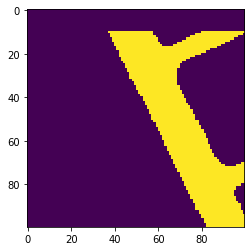

In [19]:
pit_map, pit_to_pkl_img = avm.get_rasterized_driveable_area('PIT')
plt.imshow(pit_map[:100,:100])

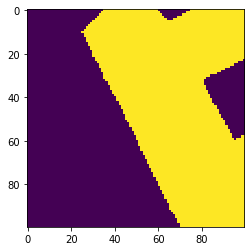

In [17]:
# pit_map = scipy.ndimage.morphology.binary_dilation(pit_map)
pit_map = scipy.ndimage.morphology.binary_dilation(pit_map)
pit_map = scipy.ndimage.morphology.binary_dilation(pit_map)
pit_map = scipy.ndimage.morphology.binary_dilation(pit_map)

plt.imshow(pit_map[:100,:100])

In [9]:
mia_map, mia_to_pkl_img = avm.get_rasterized_driveable_area('MIA')
# mia_map = scipy.ndimage.morphology.binary_dilation(mia_map)
mia_map = scipy.ndimage.morphology.binary_dilation(mia_map)
mia_map = scipy.ndimage.morphology.binary_dilation(mia_map)
mia_map = scipy.ndimage.morphology.binary_dilation(mia_map)
map_info = {'PIT':{'map':pit_map, 'transform':pit_to_pkl_img}, 'MIA':{'map':mia_map, 'transform':mia_to_pkl_img}}

In [12]:
# def traj_pts_outside_da(agent_traj, city_map, city_transform):
#     traj_h = np.concatenate((agent_traj, np.ones((len(agent_traj),1))), axis=1)
#     traj_t = np.matmul(city_transform, traj_h.T)
#     count = 0
#     for x,y in zip(traj_t[0], traj_t[1]):
#         y,x = int(y),int(x)
#         count += city_map[y][x]
#     return count

In [13]:
# output_all = np.load('output_all_map_prune.npy', allow_pickle=True).item()

100%|██████████| 1/1 [00:00<00:00,  4.21it/s]


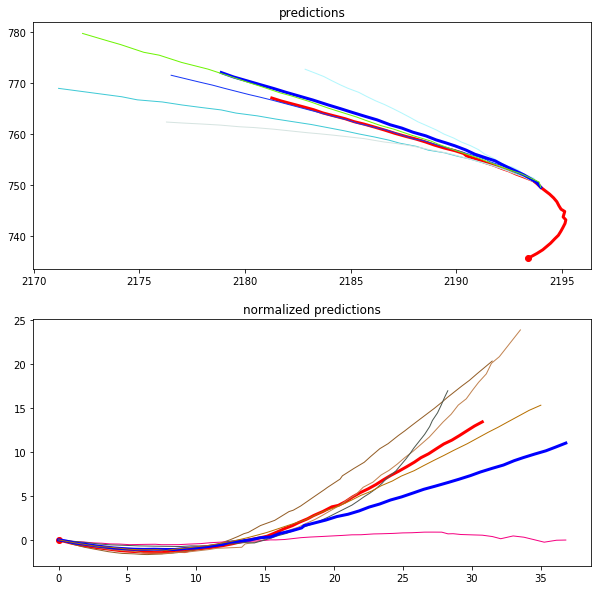

In [11]:
# counter = 0
# dir_fnames = os.listdir(val_dir)
# for fname in dir_fnames:
#     fpath = os.path.join(val_dir, f'{fname}')
#     df = pd.read_csv(fpath)
#     city = df["CITY_NAME"].values[0]
#     agent_x = df[df["OBJECT_TYPE"]=="AGENT"]["X"]
#     agent_y = df[df["OBJECT_TYPE"]=="AGENT"]["Y"]
#     agent_traj = np.column_stack((agent_x[:20],agent_y[:20]))
#     city_map, city_transform = map_info[city]['map'], map_info[city]['transform']
# #     predictions = output_all[key]
# #     for prediction in predictions:
# #         print(traj_pts_outside_da(prediction, city_map, city_transform))
#     counter += 1
#     if counter == 15: break
        

output_all = dict()
for idx in tqdm(range(1)):
#for idx in tqdm(range(len(afl))):
    seq_id = int(afl[idx].current_seq.name[:-4])
    if seq_id in output_all.keys():
        continue
    agent_traj = afl[idx].agent_traj
    city = afl[idx].city
    city_map, city_transform = map_info[city]['map'], map_info[city]['transform']
    
    top_k_idxs, predictions, metrics = get_multiple_forecasts_norm(agent_traj, 
                                                                   city, 
                                                                   norm_train_trajs, 
                                                                   train_nt_dists, 
                                                                   test_nt_dists[idx],
                                                                   avm,
                                                                   map_info,
                                                                   abs_k=10000,
                                                                   plot=True,
                                                                   is_test=False)
    output_all[seq_id] = predictions[:,20:,:]
#     print(predictions.shape)

np.save('output_all_map_prune.npy', output_all)

In [ ]:
from argoverse.evaluation.competition_util import generate_forecasting_h5
output_path = 'competition_files/'
generate_forecasting_h5(output_all, output_path, filename='knn_map_prune') #this might take awhile

In [ ]:
print(predictions)

In [ ]:
len(output_all.keys())

In [ ]:
np.save('output_all_map_prune', output_all)